In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#Read the data from the csv files
appln_df = pd.read_csv('application_data.csv')
prev_appln_df = pd.read_csv('previous_application.csv')

In [3]:
#columns of the application_data.csv
appln_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
#Columns of the previous_application.csv
prev_appln_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [5]:
#check the % of missing values in the application data
round(100*(appln_df.isnull().sum().sort_values(ascending = False)/len(appln_df.index)), 2)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

In [6]:
#check the % of missing values in the previous application data
round(100*(prev_appln_df.isnull().sum().sort_values(ascending = False)/len(prev_appln_df.index)), 2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

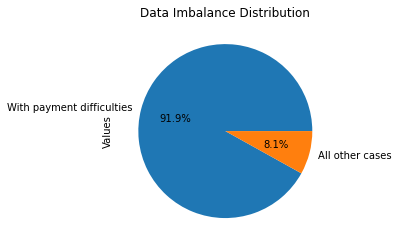

In [7]:
#Check for data imbalance
cnt = appln_df["TARGET"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df['Legend'] = ['With payment difficulties', 'All other cases']
#cnt_df
cnt_df.plot(kind='pie',y ='Values',labels=cnt_df['Legend'], title='Data Imbalance Distribution',legend = False,autopct='%1.1f%%')

In [8]:
# Check for outliers for the columns
#Approach -1
# Anything which is not in the 25th-75th percentile , would be the outlier

appln_df["AMT_CREDIT"].describe()


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

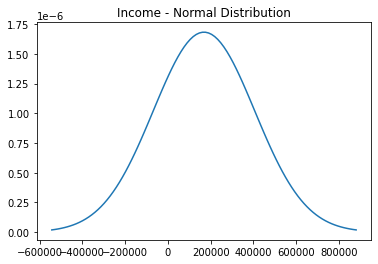

In [9]:
# Check for outliers for the columns
#Approach -2
#Anything which is not in the +/- 3 sigma range, would be the outlier 
import matplotlib.pyplot  as plt
import numpy as np
import scipy.stats as stats
import math
import statistics 

mu = appln_df["AMT_INCOME_TOTAL"].mean()
variance = statistics.variance(appln_df["AMT_INCOME_TOTAL"])
#variance
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.title('Income - Normal Distribution')
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

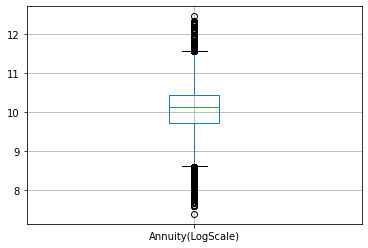

In [10]:
# Check for outliers for the columns
#Approach -3 - Box plot
values = np.log(appln_df['AMT_ANNUITY'])
appln_new_df = appln_df
appln_new_df['Annuity(LogScale)'] = values
boxplot = appln_new_df.boxplot(column=['Annuity(LogScale)']) 

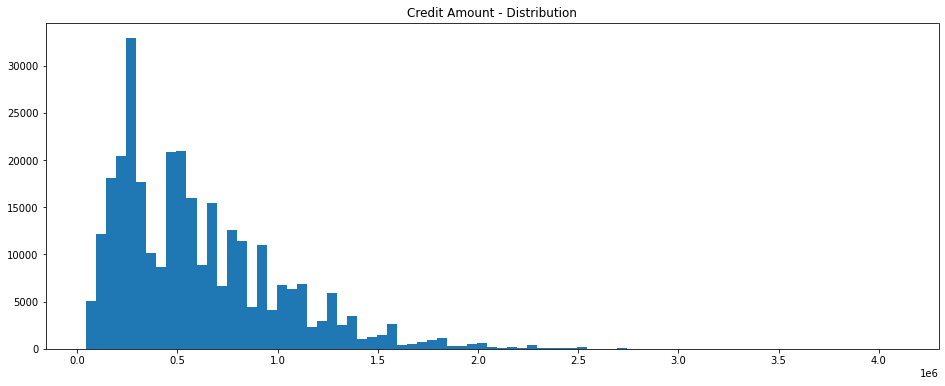

In [11]:
#Univariate Analysis - Credit Amount - Application Data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
minCredit = min(appln_df["AMT_CREDIT"])
maxCredit = max(appln_df["AMT_CREDIT"])
binwidth = 50000
#maxCredit
plt.title("Credit Amount - Distribution")
plt.hist(appln_df["AMT_CREDIT"], bins=range(round(minCredit), round(maxCredit) + binwidth, binwidth))
plt.show()

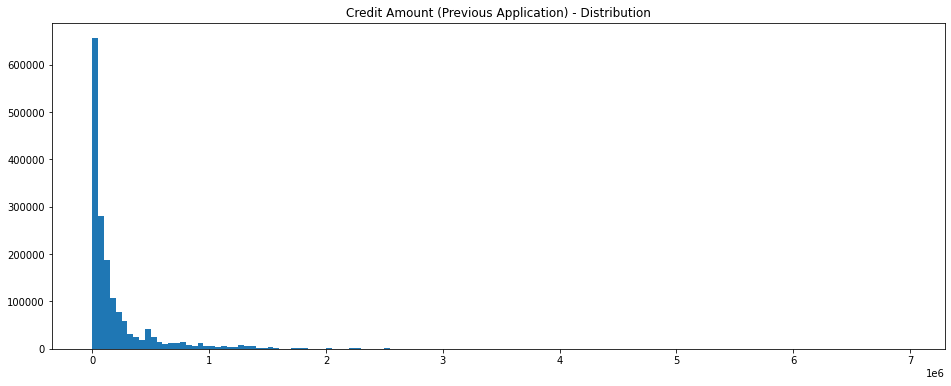

In [12]:
#Univariate Analysis - Credit Amount - Previous Appln Data
plt.figure(figsize=(16, 6))
minCredit = min(prev_appln_df["AMT_CREDIT"])
maxCredit = max(prev_appln_df["AMT_CREDIT"])
binwidth = 50000
#maxCredit
plt.title("Credit Amount (Previous Application) - Distribution")
plt.hist(prev_appln_df["AMT_CREDIT"], bins=range(round(minCredit), round(maxCredit) + binwidth, binwidth))
plt.show()

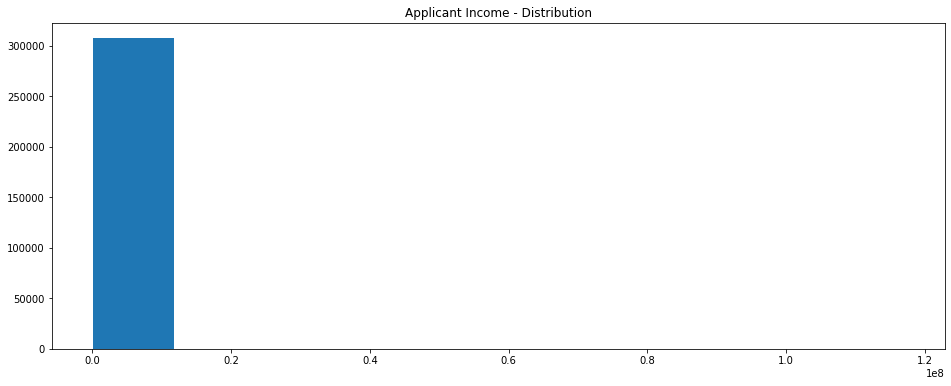

In [13]:
#Univariate Analysis of the Income data - Application Data

plt.figure(figsize=(16, 6))

minIn = min(appln_df["AMT_INCOME_TOTAL"])
maxIn = max(appln_df["AMT_INCOME_TOTAL"])
binwidth = 100000
#minIn
plt.title("Applicant Income - Distribution")
#plt.hist(appln_df["AMT_INCOME_TOTAL"], bins=range(round(minIn), round(maxIn) + binwidth, binwidth))
plt.hist(appln_df["AMT_INCOME_TOTAL"])
plt.show()

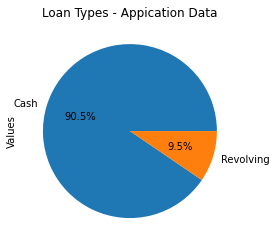

In [14]:
#Univariate analysis of the Loan Type
cnt = appln_df["NAME_CONTRACT_TYPE"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df['Legend'] = ['Cash', 'Revolving']
#cnt_df
cnt_df.plot(kind='pie',y ='Values',labels=cnt_df['Legend'], title='Loan Types - Appication Data',legend = False,autopct='%1.1f%%')


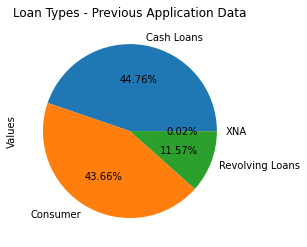

In [15]:
#Univariate analysis of the Loan Type
cnt = prev_appln_df["NAME_CONTRACT_TYPE"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df['Legend'] = ['Cash Loans', 'Consumer','Revolving Loans','XNA' ]
#cnt_df
cnt_df.plot(kind='pie',y ='Values',labels=cnt_df['Legend'], title='Loan Types - Previous Application Data',legend = False,autopct='%1.2f%%')


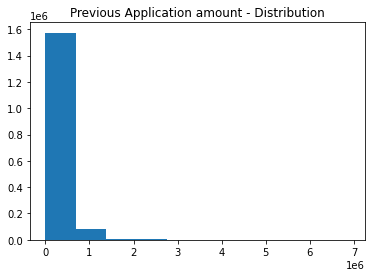

In [16]:
#Univariate Analysis - Occupation of the applicants

plt.title("Previous Application amount - Distribution")
plt.hist(prev_appln_df["AMT_APPLICATION"])
plt.show()

<Figure size 1152x432 with 0 Axes>

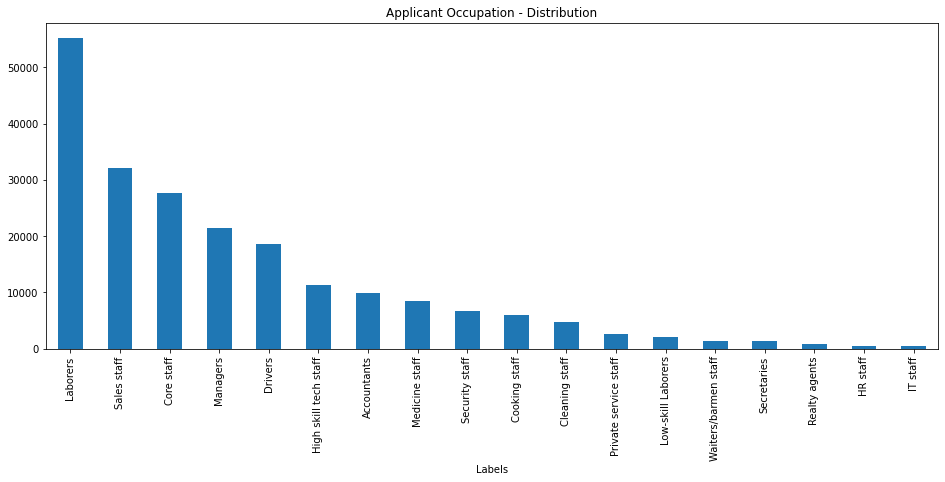

In [17]:
#Univariate Analysis - Occupation of the applicants
plt.figure(figsize=(16, 6))
cnt = appln_df["OCCUPATION_TYPE"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
#cnt_df
cnt_df.plot.bar(x='Labels',y ='Values', title='Applicant Occupation - Distribution',legend = False,figsize = (16,6))

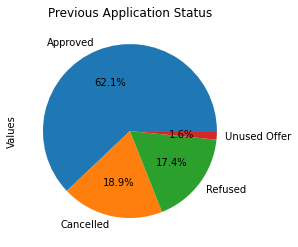

In [18]:
cnt = prev_appln_df["NAME_CONTRACT_STATUS"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df ['Legend'] = ['Approved','Cancelled','Refused','Unused Offer']
#cnt_df
cnt_df.plot(kind='pie',labels=cnt_df['Legend'],y='Values', title='Previous Application Status', autopct = '%1.1f%%',legend=False)

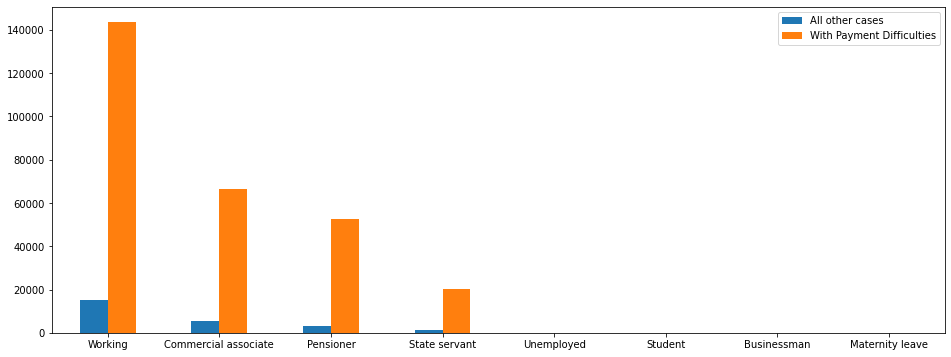

In [19]:
#Segmented Univariate Analysis - For Target being 1/0, which are the various paramaters influecing it

# Target column segmented by Income Type 
cnt = appln_df["NAME_INCOME_TYPE"].value_counts()
target0 = []
target1 = []
for val in cnt.index:
    target1.append(np.sum(appln_df["TARGET"][appln_df["NAME_INCOME_TYPE"]==val] == 1))
    target0.append(np.sum(appln_df["TARGET"][appln_df["NAME_INCOME_TYPE"]==val] == 0))  
    
graph_df = pd.DataFrame({'All other cases': target1,
                         'With Payment Difficulties': target0}, index=cnt.index)

graph_df.plot.bar(rot=0,figsize = (16,6))


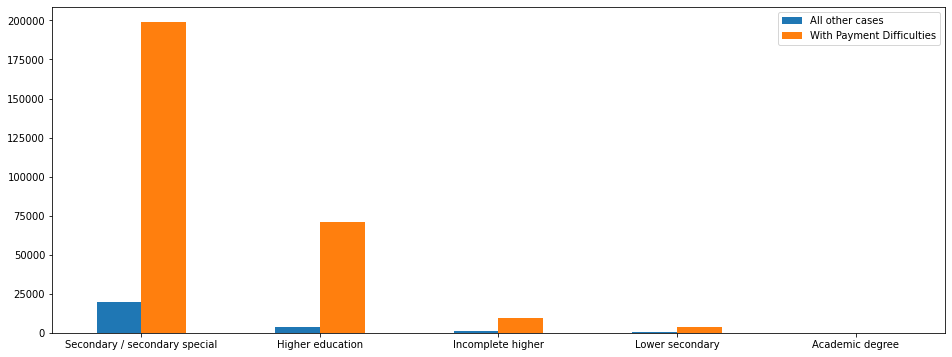

In [20]:
#Segmented Univariate Analysis - For Target being 1/0, which are the various paramaters influecing it

# Target column segmented by Education  
cnt = appln_df["NAME_EDUCATION_TYPE"].value_counts()
target0 = []
target1 = []
for val in cnt.index:
    target1.append(np.sum(appln_df["TARGET"][appln_df["NAME_EDUCATION_TYPE"]==val] == 1))
    target0.append(np.sum(appln_df["TARGET"][appln_df["NAME_EDUCATION_TYPE"]==val] == 0))  
    
graph_df = pd.DataFrame({'All other cases': target1,
                         'With Payment Difficulties': target0}, index=cnt.index)

graph_df.plot.bar(rot=0,figsize = (16,6))


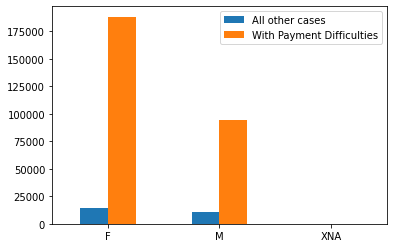

In [21]:
#Segmented Univariate Analysis - For Target being 1/0, which are the various paramaters influecing it

# Target column segmented by Gender  
cnt = appln_df["CODE_GENDER"].value_counts()
target0 = []
target1 = []
for val in cnt.index:
    target1.append(np.sum(appln_df["TARGET"][appln_df["CODE_GENDER"]==val] == 1))
    target0.append(np.sum(appln_df["TARGET"][appln_df["CODE_GENDER"]==val] == 0))  
    
graph_df = pd.DataFrame({'All other cases': target1,
                         'With Payment Difficulties': target0}, index=cnt.index)

graph_df.plot.bar(rot=0)

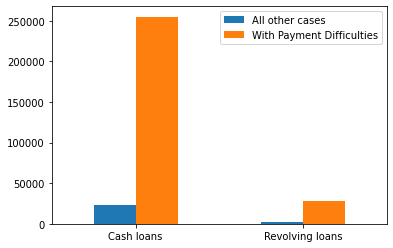

In [22]:
#Segmented Univariate Analysis - For Target being 1/0, which are the various paramaters influecing it

# Target column segmented by Loan Type  
cnt = appln_df["NAME_CONTRACT_TYPE"].value_counts()
target0 = []
target1 = []
for val in cnt.index:
    target1.append(np.sum(appln_df["TARGET"][appln_df["NAME_CONTRACT_TYPE"]==val] == 1))
    target0.append(np.sum(appln_df["TARGET"][appln_df["NAME_CONTRACT_TYPE"]==val] == 0))  
    
graph_df = pd.DataFrame({'All other cases': target1,
                         'With Payment Difficulties': target0}, index=cnt.index)

graph_df.plot.bar(rot=0)

In [23]:
# Get only a few columns (relevant to the current analysis) to check the correlation
 
appln_sub_df = appln_df[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED',
                         'REGION_RATING_CLIENT']]
#appln_sub_df.head()

prev_appln_sub_df = prev_appln_df[['AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','DAYS_DECISION','CNT_PAYMENT']]
prev_appln_sub_df.head()


,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT
0,17145.0,17145.0,0.0,-73,12.0
1,607500.0,679671.0,NaN,-164,36.0
2,112500.0,136444.5,NaN,-301,12.0
3,450000.0,470790.0,NaN,-512,12.0
4,337500.0,404055.0,NaN,-781,24.0


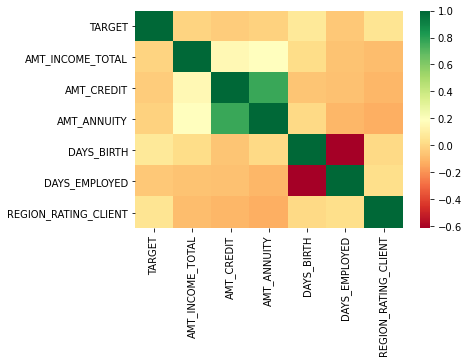

In [24]:
#Correlation - Application Data, for overall data
corr = appln_sub_df.corr()
corr
sns.heatmap(corr, cmap='RdYlGn')

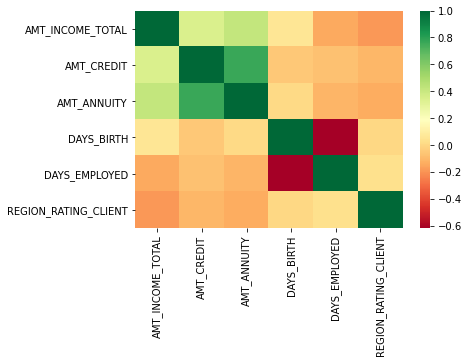

In [25]:
#Correlation - Application Data, for Target = 0
appln_sub_df_0 = appln_sub_df[(appln_sub_df['TARGET'] == 0)]
appln_sub_df_0 = appln_sub_df_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED',
                         'REGION_RATING_CLIENT']]
corr = appln_sub_df_0.corr()
#corr
sns.heatmap(corr, cmap='RdYlGn')


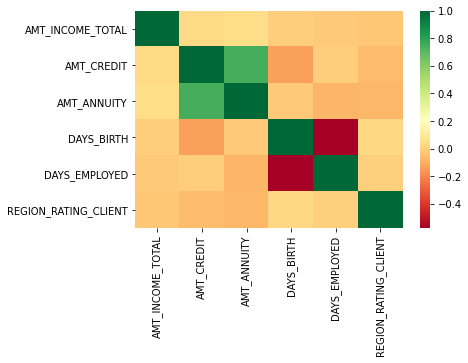

In [26]:
#Correlation - Application Data, for Target = 1
appln_sub_df_1 =  appln_sub_df[(appln_sub_df['TARGET'] == 1)]
appln_sub_df_1 = appln_sub_df_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED',
                         'REGION_RATING_CLIENT']]

corr = appln_sub_df_1.corr()
#corr
sns.heatmap(corr, cmap='RdYlGn')


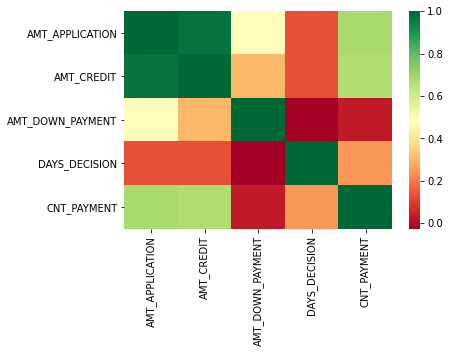

In [27]:
#Correlation - Previous Application Data
corr = prev_appln_sub_df.corr()
corr
sns.heatmap(corr, cmap='RdYlGn')

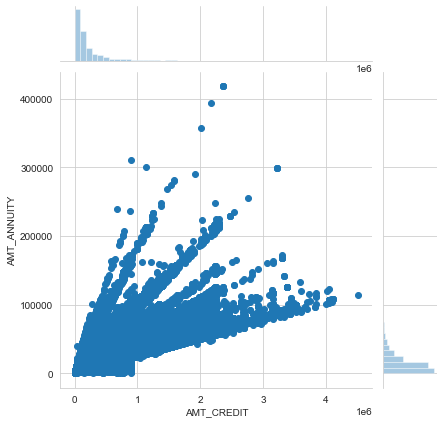

In [28]:
#Bivariate Analysis - Joint PLots for pairs of variables
#Credit Amount and Annuity
sns.set_style("whitegrid")
sns.jointplot('AMT_CREDIT', 'AMT_ANNUITY', prev_appln_df)
plt.show()

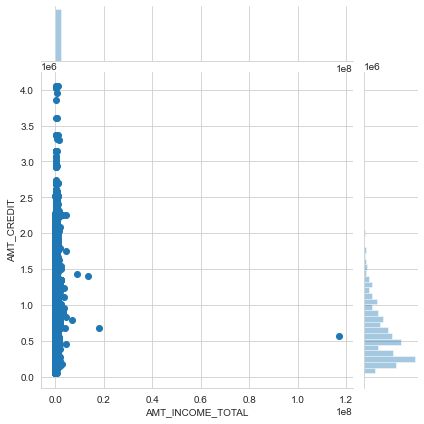

In [29]:
#Income and Credit Amount
sns.jointplot('AMT_INCOME_TOTAL','AMT_CREDIT', appln_df)
plt.show()

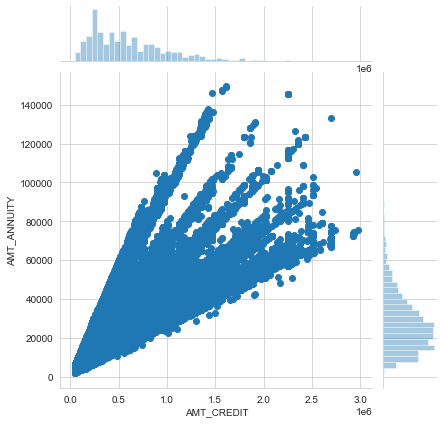

In [30]:
# Remove points having extreme values FOR APPLICATION DATA
appln_df = appln_df[(appln_df.AMT_CREDIT < 3000000) & (appln_df.AMT_ANNUITY < 150000)]

sns.jointplot('AMT_CREDIT', 'AMT_ANNUITY', appln_df)
plt.show()

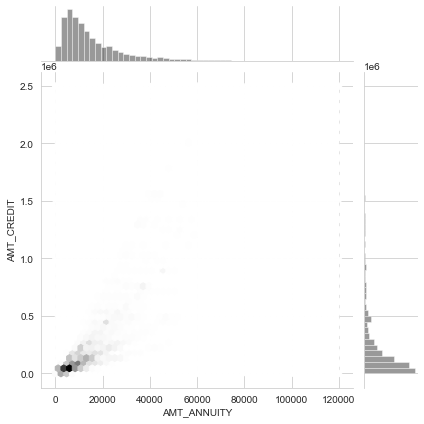

In [31]:
# plotting low amount credit and ANNUITY for application data
# hex plot

prev_appln_df = prev_appln_df[(prev_appln_df.AMT_CREDIT < 2500000) & (prev_appln_df.AMT_ANNUITY > -100) & (prev_appln_df.AMT_ANNUITY < 120000)]
sns.jointplot('AMT_ANNUITY', 'AMT_CREDIT', prev_appln_df, kind="hex", color="k")
plt.show()